## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [1]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros
import numpy as np

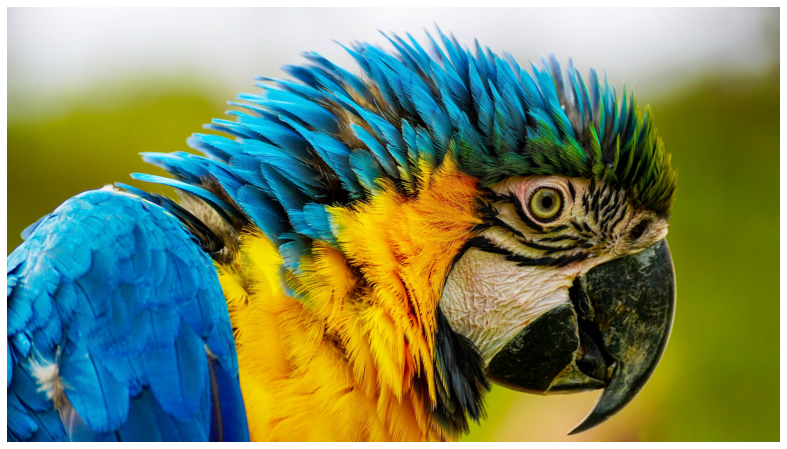

In [2]:
# Load an image.
imagex = image.imread("parrot.jpeg") # You may want to test with a smaller image, it will be faster
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [ ]:
import random

def gen_centroids(clusters, image):
    centroids = []
    for i in range(clusters):
        centroids.append(image[random.randint(0, len(image) - 1)])
    return centroids

def calc_distance(a, b):
    return (sum((a - b) ** 2)) ** 0.5

def get_centroids(centroids, image):
    labels = []
    for p in image:
        distance = []
        for c in centroids:
            distance.append(calc_distance(p, c))
        labels.append(np.argmin(distance))
    return labels

def calc_centroids(labels, image, clusters):
    numerators = []
    totals = np.zeros(clusters, dtype=int).tolist()
    for i in range(clusters):
        totals.append([0, 0, 0])
        numerators.append(np.zeros(3).tolist())
    
    for i in range(len(labels)):
        numerators[labels[i]] = [
            numerators[labels[i]][0] + image[i][0],                      
            numerators[labels[i]][1] + image[i][1], 
            numerators[labels[i]][2] + image[i][2]
        ]
        totals[labels[i]] += 1

    new_centroids = []
    for i in range(clusters):
        j = i
        new_centroids.append([
            numerators[i][0] / totals[i], 
            numerators[i][1] / totals[i], 
            numerators[i][2] / totals[i]
        ])
    return new_centroids
       
    

def calc_diff(centroids, new_centroids):
    diff = []
    for i in range(len(centroids)):
        diff.append(calc_distance(np.array(centroids[i]), np.array(new_centroids[i])))
    return max(diff)

def k_means(clusters, image):
    centroids = gen_centroids(clusters, image)
    diff = 1
    i = 0
    
    while diff > 0.01 and i < 10:
        labels = get_centroids(centroids, image)
        new_centroids = calc_centroids(labels, image, clusters)
        diff = calc_diff(centroids, new_centroids)
        centroids = new_centroids
        i += 1
        
    return labels

cluster_count = 5
cluster_labels = k_means(cluster_count, image_2d)

In [ ]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

In [ ]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')